In [2]:
# Class to colorize, bold, or underline output
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# 
import pandas as pd
import numpy as np

data = pd.DataFrame({'Country':['Spain', 'Italy', 'Chile', 'Brazil', 'Canada', 'North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Mayanmar', 'Iceland', 'Germany', 'Cuba'], 
                     'Continent':['Europe', 'Europe', 'South America', 'South America', 'North America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'North America', 'Europe',
                                  'Central America']})

# Categorical Binning Example
conditions = [
    data['Country'].str.contains('Spain'),
    data['Country'].str.contains('Italy'),
    data['Country'].str.contains('Chile'),
    data['Country'].str.contains('Brazil'),
    data['Country'].str.contains('Canada'),
    data['Country'].str.contains('North Korea'),
    data['Country'].str.contains('Vietnam'),
    data['Country'].str.contains('Thailand'),
    data['Country'].str.contains('Malaysia'),
    data['Country'].str.contains('Mayanmar'),
    data['Country'].str.contains('Iceland'),
    data['Country'].str.contains('Germany'),
    data['Country'].str.contains('Cuba')]

choices = np.array(['Europe', 'Europe', 'South America', 'South America', 'North America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'North America', 'Europe', 'South America'])
unique, counts = np.unique(choices, return_counts=True)
data['Continent'] = np.select(conditions, choices, default='Other')
print(color.BOLD + color.PURPLE + "\nCountries by continent" + color.END)
data


Countries by continent


,Country,Continent
0,Spain,Europe
1,Italy,Europe
2,Chile,South America
3,Brazil,South America
4,Canada,North America
5,North Korea,Asia
6,Vietnam,Asia
7,Thailand,Asia
8,Malaysia,Asia
9,Mayanmar,Asia


{'Asia': 5, 'Europe': 3, 'North America': 2, 'South America': 3}

Countries binned by continent


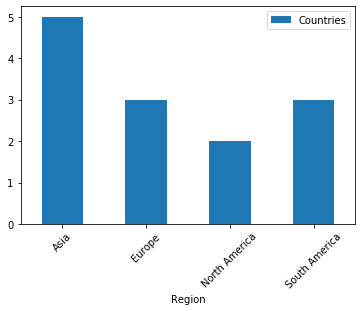

In [3]:
print(dict(zip(unique, counts)))

df = pd.DataFrame({'Region': unique.ravel(), 'Countries': counts.ravel()})
print(color.BOLD + color.PURPLE + "\nCountries binned by continent" + color.END)
ax = df.plot.bar(x='Region', y='Countries', rot=45)

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

# Numerical Binning Example

revenue_df = pd.read_excel('https://github.com/vbloise3/WhizLabsML/blob/master/binning/201_Revenue_Total.xlsx?raw=true')
print(color.BOLD + color.PURPLE + "\nNumber of observations: " + str(len(revenue_df.index)) + color.END)
revenue_df


Number of observations: 1507


,reference number,name,price,date
0,740150,Thomas LLC,3380.91,2018-01-01 07:21:51
1,714466,Sillians-Krapfs,-63.16,2018-01-01 10:00:47
2,218895,Snodgrass Inc,2086.10,2018-01-01 13:24:58
3,307599,"Craut, Oniote and Johnson",863.05,2018-01-01 15:05:22
4,412290,Judais-Pewrters,499.26,2018-01-01 23:26:55
...,...,...,...,...
1502,424914,Green-Brown,1582.49,2018-11-27 14:29:02
1503,424914,Green-Brown,1049.28,2018-12-19 15:15:41
1504,424914,Green-Brown,2166.75,2018-12-29 13:03:54
1505,424914,Green-Brown,1915.00,2018-12-22 03:31:36


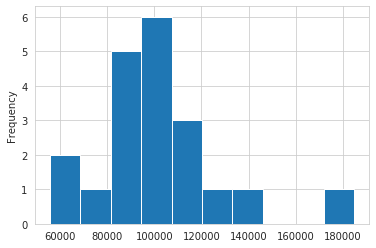

In [36]:
sns.set_style('whitegrid')
df = revenue_df.groupby(['reference number', 'name'])['price'].sum().reset_index()
df['price'].plot(kind='hist')

In [37]:
# Quantile binning example
print(color.BOLD + color.PURPLE + "\nqcut: a quantile-based discretization function that divides up the data into equal sized bins" + color.END)
print(df['price'].describe())

df['quantile_price_quartiles'] = pd.qcut(df['price'], q=4)
df['quantile_price_deciles'] = pd.qcut(df['price'], q=10, precision=0)
bin_labels_5 = ['Rookie', 'Sophomore', 'Junior', 'Senior', 'Professional']
df['quantile_price_quintiles'] = pd.qcut(df['price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
print(color.BOLD + color.PURPLE + "\nThree examples: quartiles, deciles, quintiles" + color.END)
df.head()


qcut: a quantile-based discretization function that divides up the data into equal sized bins
count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: price, dtype: float64

Three examples: quartiles, deciles, quintiles


,reference number,name,price,quantile_price_quartiles,quantile_price_deciles,quantile_price_quintiles
0,141962,Speilmans LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Rookie
1,146832,Jones-Spank,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Junior
2,163416,Muns-Kalifan,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Rookie
3,218895,Snodgrass Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Professional
4,239344,Finley LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Sophomore


In [38]:
# Check the bin ranges
print(color.BOLD + color.PURPLE + "\nWhat ranges identify the bins?" + color.END)
results, bin_edges = pd.qcut(df['price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])
results_table


What ranges identify the bins?


,Threshold,Tier
0,55733.050,Rookie
1,87167.958,Sophomore
2,95908.156,Junior
3,103605.970,Senior
4,112290.054,Professional


In [40]:
# Check the bin distribution
print(color.BOLD + color.PURPLE + "\nBin distribution:" + color.END)
df['quantile_price_quintiles'].value_counts()


Bin distribution:


Professional    4
Senior          4
Junior          4
Sophomore       4
Rookie          4
Name: quantile_price_quintiles, dtype: int64